<a href="https://colab.research.google.com/github/saka-21/colab_sample/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
from sklearn.datasets import load_boston
# 学習用データ準備
boston = load_boston()

In [15]:
x_org, yt = boston.data, boston.target
feature_names = boston.feature_names
print('元データ', x_org.shape, yt.shape)
print('項目名', feature_names)


元データ (506, 13) (506,)
項目名 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [20]:
# データの絞り込み（項目　RMのみ）
x_data = x_org[:, feature_names=='RM']
print('絞りこみ後', x_data.shape)

# ダミー変数を追加
x = np.insert(x_data, 0, 1.0, axis=1)
print('ダミー変数追加後', x.shape)

絞りこみ後 (506, 1)
ダミー変数追加後 (506, 2)


array([[1.   , 6.575],
       [1.   , 6.421],
       [1.   , 7.185],
       ...,
       [1.   , 6.976],
       [1.   , 6.794],
       [1.   , 6.03 ]])

In [21]:
# 入力データxの表示（ダミー変数を含む）
print(x.shape)
print(x[:5, :])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [22]:
# 正解データyの表示
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


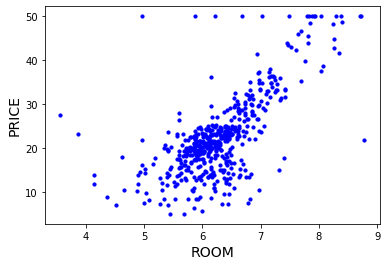

In [24]:
# 散布図の表示
plt.scatter(x[:, 1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.show()

In [25]:
# 予測関数（1, x）の値から予測値ypを計算する
def pred(x, w):
  return(x @ w)

In [26]:
# 初期化処理
# データ系列総数
M = x.shape[0]

# 入力データ次元数（ダミー変数を含む）
D = x.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値（全ての値を１にする）
w = np.ones(D)

# 評価結果記録用（損失関数のみ記録）
history = np.zeros((0, 2))

In [27]:
# 繰り返しループ
for k in range(iters):
  # 予測値の計算
  yp = pred(x, w)

  # 誤差の計算
  yd = yp - yt

  # 勾配降下法の実装
  w = w -alpha * (x.T @ yd) / M

  # 学習曲線描画用データの計算、保存
  if(k % 100 == 0):
    # 損失関数値の計算
    loss = np.mean(yd ** 2) / 2
    # 計算結果の記録
    history = np.vstack((history, np.array([k, loss])))
    # 画面表示
    print('iter = {} loss = {}'.format(k, loss))

iter = 0 loss = 154.22493384090907
iter = 100 loss = 29.61751801156841
iter = 200 loss = 29.43176621285963
iter = 300 loss = 29.250428212542577
iter = 400 loss = 29.073399130791746
iter = 500 loss = 28.90057657991573
iter = 600 loss = 28.731860605139747
iter = 700 loss = 28.56715362679504
iter = 800 loss = 28.406360383882138
iter = 900 loss = 28.249387878975032
iter = 1000 loss = 28.096145324434623
iter = 1100 loss = 27.94654408990015
iter = 1200 loss = 27.800497651028387
iter = 1300 loss = 27.657921539450868
iter = 1400 loss = 27.51873329392016
iter = 1500 loss = 27.38285241261713
iter = 1600 loss = 27.250200306591278
iter = 1700 loss = 27.120700254307618
iter = 1800 loss = 26.99427735727346
iter = 1900 loss = 26.870858496719627
iter = 2000 loss = 26.75037229131106
iter = 2100 loss = 26.632749055862163
iter = 2200 loss = 26.517920761033313
iter = 2300 loss = 26.405820993984896
iter = 2400 loss = 26.29638491996638
iter = 2500 loss = 26.18954924481808
iter = 2600 loss = 26.0852521783638

In [28]:
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 154.224934
損失関数最終値: 21.800325


In [29]:
xall = x[:,1].ravel()
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)

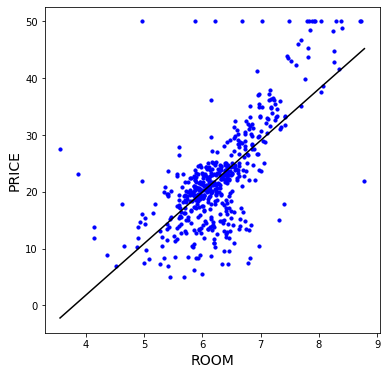

In [30]:
# 散布図と回帰直線の描画
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:,1], yl, c='k')# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.show()
plt.show()

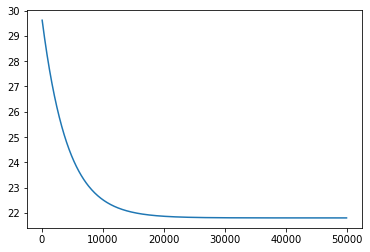

In [31]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.show()

In [33]:
 # 重回帰モデルに応用
 # 列の追加
 x_add = x_org[:, feature_names == 'LSTAT']
 x2 = np.hstack((x, x_add))
 print(x2.shape)

(506, 3)


In [34]:
# 入力データxの表示（ダミーデータを含む）
print(x2[:5, :])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [39]:
# 初期化処理
# データ系列総数
M = x2.shape[0]

# 入力データ次元数（ダミー変数を含む）
D = x2.shape[1]

# 繰り返し回数
iters = 2000

# 学習率
alpha = 0.001

# 重みベクトルの初期値（全ての値を１にする）
w = np.ones(D)

# 評価結果記録用（損失関数のみ記録）
history = np.zeros((0, 2))

In [40]:
# 繰り返しループ
for k in range(iters):
  # 予測値の計算
  yp = pred(x2, w)

  # 誤差の計算
  yd = yp - yt

  # 勾配降下法の実装
  w = w -alpha * (x2.T @ yd) / M

  # 学習曲線描画用データの計算、保存
  if(k % 100 == 0):
    # 損失関数値の計算
    loss = np.mean(yd ** 2) / 2
    # 計算結果の記録
    history = np.vstack((history, np.array([k, loss])))
    # 画面表示
    print('iter = {} loss = {}'.format(k, loss))

iter = 0 loss = 112.0639816077075
iter = 100 loss = 25.358934200838426
iter = 200 loss = 16.391054850586045
iter = 300 loss = 15.403015477091875
iter = 400 loss = 15.294135006632079
iter = 500 loss = 15.282113695594543
iter = 600 loss = 15.280763630069565
iter = 700 loss = 15.280589272586079
iter = 800 loss = 15.280544476062445
iter = 900 loss = 15.280513983829717
iter = 1000 loss = 15.280485097737486
iter = 1100 loss = 15.280456418763167
iter = 1200 loss = 15.280427792737308
iter = 1300 loss = 15.280399202639066
iter = 1400 loss = 15.280370646557646
iter = 1500 loss = 15.280342124247017
iter = 1600 loss = 15.280313635644589
iter = 1700 loss = 15.280285180708036
iter = 1800 loss = 15.28025675939729
iter = 1900 loss = 15.28022837167259


In [41]:
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 112.063982
損失関数最終値: 15.280228
